In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/data/jmharja/projects/PersonaClassifier/twitter_SU/substance_trait.csv')
df['Trait'] = df['Trait'].str.replace('c', '')
df

,Unnamed: 0,Substance,Trait,OR,CI Lower,CI Upper,n,OR (95% CI)
0,0,tobacco,OPN,0.943626,0.935976,0.951338,65623,"0.94 [0.94, 0.95]"
1,1,tobacco,CON,0.986158,0.978264,0.994115,65623,"0.99 [0.98, 0.99]"
2,2,tobacco,EXT,1.200668,1.191650,1.209754,65623,"1.20 [1.19, 1.21]"
3,3,tobacco,AGR,0.805228,0.798908,0.811597,65623,"0.81 [0.80, 0.81]"
4,4,tobacco,NEU,0.771948,0.765887,0.778057,65623,"0.77 [0.77, 0.78]"
5,5,alcohol,OPN,1.164446,1.159678,1.169234,319650,"1.16 [1.16, 1.17]"
6,6,alcohol,CON,0.858467,0.855098,0.861850,319650,"0.86 [0.86, 0.86]"
7,7,alcohol,EXT,1.128592,1.124365,1.132835,319650,"1.13 [1.12, 1.13]"
8,8,alcohol,AGR,1.328010,1.323001,1.333038,319650,"1.33 [1.32, 1.33]"
9,9,alcohol,NEU,1.182063,1.177681,1.186462,319650,"1.18 [1.18, 1.19]"


In [5]:
drugs_map = {
            'tobacco' :'Tobacco',
            'alcohol' : 'Alcohol',
            'cannabinoids' : 'Cannabinoids',
            'opioids' : 'Opioids',
            'stimulants' : 'Stimulants',
            'club_drugs' : 'Club Drugs',
            'dissociative_drugs': 'Dissociative Drugs',
            'hallucinogens' : 'Hallucinogens',
            'other_compounds' : 'Other Compounds',
            'prescription_medications' : 'Prescription Medications'
}
substances = list(drugs_map.keys())

/tmp/ipykernel_525825/2335214858.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['y_pos'] = left_df.groupby('Substance').cumcount()
/tmp/ipykernel_525825/2335214858.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['y_pos'] += (left_df['Substance'].astype('category').cat.codes * (max_traits + 1))
/tmp/ipykernel_525825/2335214858.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



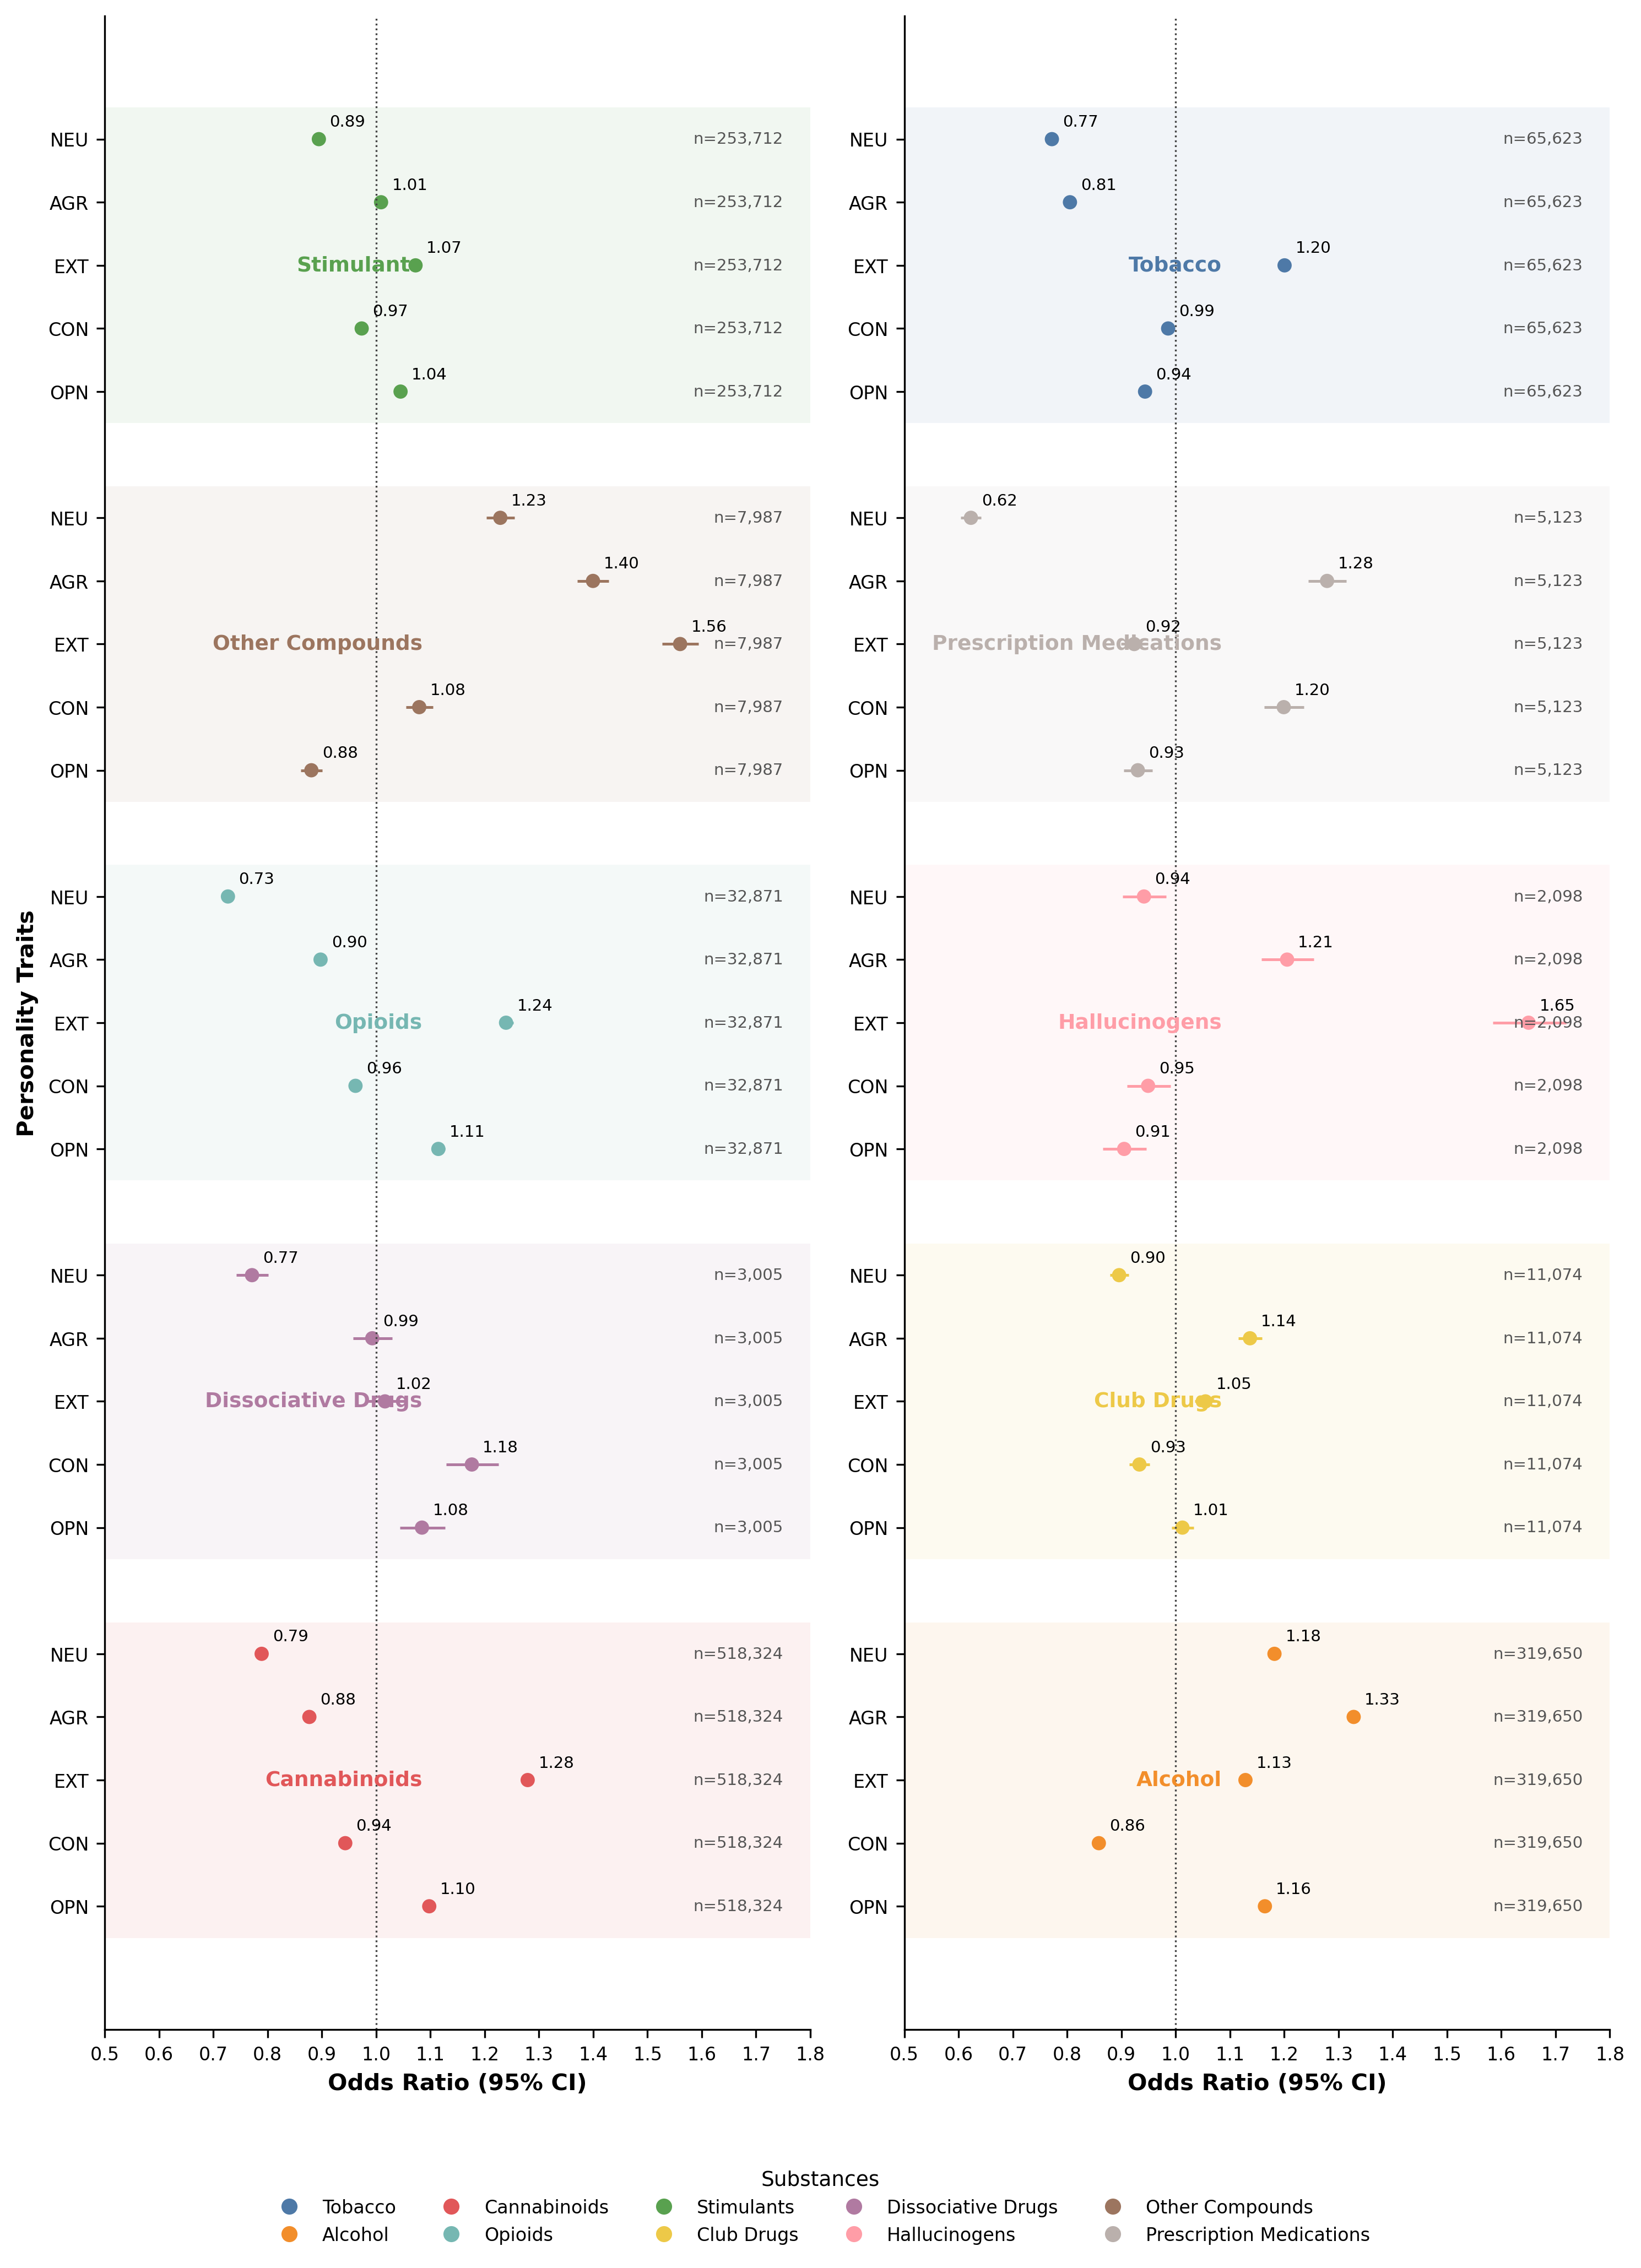

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# --- JIMR Style Setup ---
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 9,
    'axes.titlesize': 11,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.titlesize': 12
})

# Create figure with two columns
fig = plt.figure(figsize=(10, 14), dpi=300)
gs = GridSpec(1, 2, width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
sns.despine()

palette = {
    "tobacco": "#4e79a7",
    "alcohol": "#f28e2b",
    "cannabinoids": "#e15759",
    "opioids": "#76b7b2",
    "stimulants": "#59a14f",
    "club_drugs": "#edc948",
    "dissociative_drugs": "#b07aa1",
    "hallucinogens": "#ff9da7",
    "other_compounds": "#9c755f",
    "prescription_medications": "#bab0ac"
}

# Split substances into two groups
substances = df['Substance'].unique()
# left_substances = substances[:5]
# right_substances = substances[5:]

substance_pairs = [
    ("cannabinoids", "alcohol"),
    ("stimulants", "tobacco"),
    ("opioids", "club_drugs"),
    ("other_compounds", "prescription_medications"),
    ("dissociative_drugs", "hallucinogens")
]
# Flatten the pairs into left and right groups
left_substances = [pair[0] for pair in substance_pairs]
right_substances = [pair[1] for pair in substance_pairs]

# --- LEFT PLOT ---
left_df = df[df['Substance'].isin(left_substances)]
left_df['y_pos'] = left_df.groupby('Substance').cumcount()
max_traits = left_df['Trait'].nunique()
left_df['y_pos'] += (left_df['Substance'].astype('category').cat.codes * (max_traits + 1))

# Error bars
for _, row in left_df.iterrows():
    ax1.plot(
        [row['CI Lower'], row['CI Upper']],
        [row['y_pos'], row['y_pos']],
        color=palette[row['Substance']],
        linewidth=1.2,
        solid_capstyle='butt'
    )

# Points
sns.scatterplot(
    data=left_df,
    x='OR',
    y='y_pos',
    hue='Substance',
    palette=palette,
    s=45,
    edgecolor='w',
    linewidth=0.5,
    ax=ax1
)

# Reference line
ax1.axvline(x=1, color='#444444', linestyle=':', linewidth=0.8)

# Y-axis
ax1.set_yticks(left_df['y_pos'])
ax1.set_yticklabels(left_df['Trait'])
ax1.set_ylabel("Personality Traits", fontweight='bold')

# X-axis
ax1.set_xlabel("Odds Ratio (95% CI)", fontweight='bold')
ax1.set_xlim(0.5, 1.8)
ax1.set_xticks(np.arange(0.5, 1.9, 0.1))

# Substance labels
for substance in left_substances:
    ymin = left_df[left_df['Substance'] == substance]['y_pos'].min() - 0.5
    ymax = left_df[left_df['Substance'] == substance]['y_pos'].max() + 0.5
    ax1.axhspan(ymin, ymax, facecolor=palette[substance], alpha=0.08)
    ax1.text(
        0.45, (ymin + ymax)/2, substance.replace("_", " ").title(),
        ha='right', va='center',
        transform=ax1.get_yaxis_transform(),
        fontsize=9,
        fontweight='bold',
        color=palette[substance]
    )

# --- RIGHT PLOT ---
right_df = df[df['Substance'].isin(right_substances)]
right_df['y_pos'] = right_df.groupby('Substance').cumcount()
right_df['y_pos'] += (right_df['Substance'].astype('category').cat.codes * (max_traits + 1))

# Error bars
for _, row in right_df.iterrows():
    ax2.plot(
        [row['CI Lower'], row['CI Upper']],
        [row['y_pos'], row['y_pos']],
        color=palette[row['Substance']],
        linewidth=1.2,
        solid_capstyle='butt'
    )

# Points
sns.scatterplot(
    data=right_df,
    x='OR',
    y='y_pos',
    hue='Substance',
    palette=palette,
    s=45,
    edgecolor='w',
    linewidth=0.5,
    ax=ax2
)

# Reference line
ax2.axvline(x=1, color='#444444', linestyle=':', linewidth=0.8)
ax2.set_ylabel("")
ax2.set_xlabel("Odds Ratio (95% CI)", fontweight='bold')
ax2.set_xlim(0.5, 1.8)
ax2.set_xticks(np.arange(0.5, 1.9, 0.1))

# Substance labels
for substance in right_substances:
    ymin = right_df[right_df['Substance'] == substance]['y_pos'].min() - 0.5
    ymax = right_df[right_df['Substance'] == substance]['y_pos'].max() + 0.5
    ax2.axhspan(ymin, ymax, facecolor=palette[substance], alpha=0.08)
    ax2.text(
        0.45, (ymin + ymax)/2, substance.replace("_", " ").title(),
        ha='right', va='center',
        transform=ax2.get_yaxis_transform(),
        fontsize=9,
        fontweight='bold',
        color=palette[substance]
    )

# --- Annotations for Both Plots ---
for ax in [ax1, ax2]:
    # Add OR values
    for _, row in (left_df if ax == ax1 else right_df).iterrows():
        ax.text(
            row['OR'] + 0.02, row['y_pos'] + 0.15,
            f"{row['OR']:.2f}",
            ha='left', va='bottom',
            fontsize=7
        )
    
    # Add sample sizes
    for _, row in (left_df if ax == ax1 else right_df).iterrows():
        ax.text(
            1.75, row['y_pos'], f"n={row['n']:,}",
            ha='right', va='center',
            fontsize=7,
            color='#555555'
        )

# Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', 
            markerfacecolor=palette[s], markersize=8) for s in substances]
fig.legend(handles, [s.replace("_", " ").title() for s in substances],
           title='Substances',
           bbox_to_anchor=(0.5, 0.02), loc='lower center',
           ncol=5, frameon=False)
ax1.get_legend().remove()  # Remove legend from left plot
ax2.get_legend().remove()  # Remove legend from right plot
plt.tight_layout()
plt.subplots_adjust(bottom=0.12)  # Make space for legend

# Save (uncomment if needed)
plt.savefig('figures/forest_plot_jimr_2panel.png', dpi=300, bbox_inches='tight')
plt.show()